In [55]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
import folium

In [2]:

r = requests.get('https://data.airbreizh.asso.fr/geoserver/ind_bretagne_agglo/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=ind_bretagne_agglo:ind_bretagne_agglo&outputFormat=csv')
data = pd.read_csv(io.StringIO(r.text), sep=",")
data.head()

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5efd,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5efe,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5eff,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5f00,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5f01,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600


In [3]:
data["latitude"] = 0
data["longitude"] = 0

data["latitude"][data["lib_zone"] == 'Brest Métropole'] = 48.390394
data["longitude"][data["lib_zone"] == 'Brest Métropole'] = -4.486076

data["latitude"][data["lib_zone"] == 'CA Golfe du Morbihan - Vannes'] = 47.658236
data["longitude"][data["lib_zone"] == 'CA Golfe du Morbihan - Vannes'] = -2.760847

data["latitude"][data["lib_zone"] == 'CA Lorient'] = 47.7482524
data["longitude"][data["lib_zone"] == 'CA Lorient'] = -3.3702449

data["latitude"][data["lib_zone"] == 'CA Quimper Bretagne Occidentale'] = 47.997542
data["longitude"][data["lib_zone"] == 'CA Quimper Bretagne Occidentale'] = -4.097899

data["latitude"][data["lib_zone"] == 'CA Saint-Brieuc Armor'] = 48.51418
data["longitude"][data["lib_zone"] == 'CA Saint-Brieuc Armor'] = -2.765835

data["latitude"][data["lib_zone"] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'] = 48.649337
data["longitude"][data["lib_zone"] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)'] = -2.025674

data["latitude"][data["lib_zone"] == 'Rennes Métropole'] = 48.117266
data["longitude"][data["lib_zone"] == 'Rennes Métropole'] = -1.6777926


<ipython-input-3-881647ad558f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["latitude"][data["lib_zone"] == 'Brest Métropole'] = 48.390394
<ipython-input-3-881647ad558f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["longitude"][data["lib_zone"] == 'Brest Métropole'] = -4.486076
<ipython-input-3-881647ad558f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["latitude"][data["lib_zone"] == 'CA Golfe du Morbihan - V

In [4]:
data

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,latitude,longitude
0,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5efd,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,48.514180,-2.765835
1,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5efe,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,47.658236,-2.760847
2,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5eff,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,47.997542,-4.097899
3,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5f00,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,48.117266,-1.677793
4,ind_bretagne_agglo.fid-73954a3d_177c53e817e_5f01,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,48.649337,-2.025674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,ind_bretagne_agglo.fid-73954a3d_177c53e817e_68eb,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148),#99E600,48.514180,-2.765835
2543,ind_bretagne_agglo.fid-73954a3d_177c53e817e_68ec,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600,47.997542,-4.097899
2544,ind_bretagne_agglo.fid-73954a3d_177c53e817e_68ed,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200042174,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848),#99E600,47.748252,-3.370245
2545,ind_bretagne_agglo.fid-73954a3d_177c53e817e_68ee,2020-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687),#99E600,48.649337,-2.025674


In [12]:
data.groupby('lib_zone').mean()

,valeur,code_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,latitude,longitude
lib_zone,,,,,,,,,
Brest Métropole,3.819945,242900314.0,1.290859,0.0,3.598338,2.916898,0.0,48.390394,-4.486076
CA Golfe du Morbihan - Vannes,3.723288,200067932.0,1.263014,0.0,3.536986,2.632877,0.0,47.658236,-2.760847
CA Lorient,3.731507,200042174.0,1.246575,0.0,3.550685,2.687671,0.0,47.748252,-3.370245
CA Quimper Bretagne Occidentale,3.713115,200068120.0,1.150273,0.0,3.565574,2.655738,0.0,47.997542,-4.097899
CA Saint-Brieuc Armor,3.660274,200069409.0,1.235616,0.0,3.479452,2.641096,0.0,48.514180,-2.765835
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,243500782.0,1.181818,0.0,3.479339,3.011019,0.0,48.649337,-2.025674
Rennes Métropole,3.646409,243500139.0,1.439227,0.0,3.411602,2.748619,0.0,48.117266,-1.677793


In [23]:
#data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
#plt.show()

Text(0.5, 0, 'Longitude')

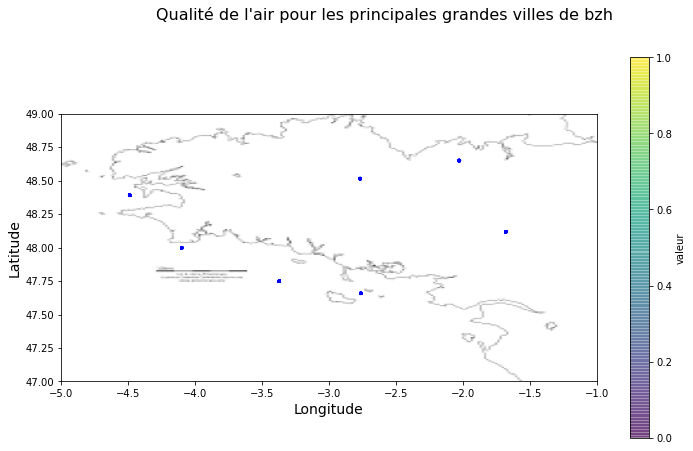

In [69]:
plt.figure(figsize=(12,7))
bzh_img=mpimg.imread('bzh.png')

plt.imshow(bzh_img,zorder=0,extent=[-5,-1,47,49.])
plt.suptitle("Qualité de l'air pour les principales grandes villes de bzh", fontsize=16)

plt.scatter(data['longitude'],data['latitude'],alpha=0.5,s=data['valeur'],c="blue", cmap = plt.get_cmap('jet'))
plt.colorbar(label="valeur")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

